In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

1) Future eng(data cleaning, missing data, data normalizong)
2) Naive model
3) loss functions
4) create neural network (*)

In [3]:
df = pd.read_csv('Rates.csv')

In [4]:
df

,Ամսաթիվ,EUR
03/01/2023,415.61,NaN
04/01/2023,418.95,NaN
05/01/2023,419.18,NaN
09/01/2023,421.43,NaN
10/01/2023,424.21,NaN
...,...,...
09/10/2023,425.44,NaN
10/10/2023,420.93,NaN
11/10/2023,419.01,NaN
12/10/2023,422.29,NaN


In [5]:
data = df['Ամսաթիվ'].values

In [6]:
y_t = data[1:]
y_t_1 = data[:-1]

In [7]:
df = pd.DataFrame(data= y_t,columns=['y_t_1'])

In [8]:
df['y_t'] = y_t

In [9]:
df

,y_t_1,y_t
0,418.95,418.95
1,419.18,419.18
2,421.43,421.43
3,424.21,424.21
4,425.58,425.58
...,...,...
191,425.44,425.44
192,420.93,420.93
193,419.01,419.01
194,422.29,422.29


In [10]:
df.corr()

,y_t_1,y_t
y_t_1,1.0,1.0
y_t,1.0,1.0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('y_t',axis =1)
y = df['y_t']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [20]:
new_arr = np.array([423]).reshape(1,-1)
model.predict(new_arr)

array([423.])

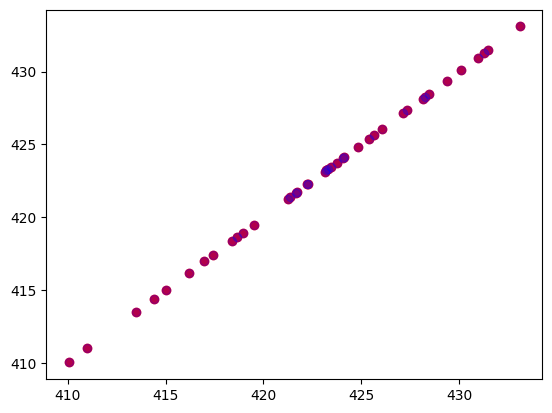

In [22]:
plt.scatter(X_test,y_test,color='red')
plt.scatter(X_test,y_pred,color='blue',alpha=0.3)
plt.show()

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu, input_shape=[1]),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

In [25]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate = 0.01, 
                                        initial_accumulator_value = 0.1, 
                                        epsilon = 1e-07, name = "Adagrad")
model.compile(loss='mean_squared_error',optimizer=optimizer)
model.fit(X,y,epochs=500)

Epoch 1/500
7/7 [==============================] - 1s 7ms/step - loss: 68885.5625
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 3221.2549
Epoch 3/500
7/7 [==============================] - 0s 8ms/step - loss: 3.2934
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 8.3315e-05
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 2.8471e-05
Epoch 6/500
7/7 [==============================] - 0s 6ms/step - loss: 2.8919e-05
Epoch 7/500
7/7 [==============================] - 0s 5ms/step - loss: 2.8609e-05
Epoch 8/500
7/7 [==============================] - 0s 7ms/step - loss: 2.8363e-05
Epoch 9/500
7/7 [==============================] - 0s 4ms/step - loss: 2.8826e-05
Epoch 10/500
7/7 [==============================] - 0s 3ms/step - loss: 2.8800e-05
Epoch 11/500
7/7 [==============================] - 0s 3ms/step - loss: 2.8691e-05
Epoch 12/500
7/7 [==============================] - 0s 3ms/step - loss: 2.8056e-05
Epoch 13/500
7/7 [

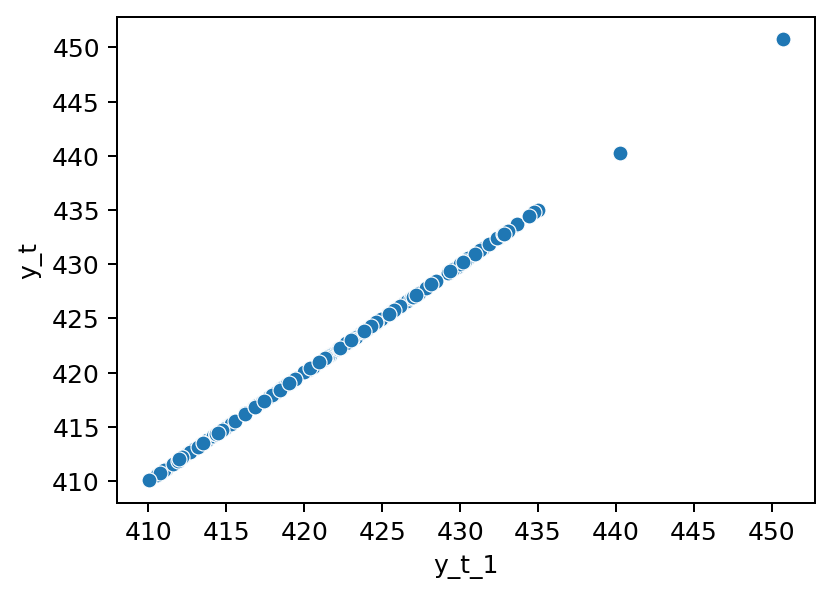

In [26]:
figure = plt.figure(figsize = (5, 3.5), dpi = 180)
sns.scatterplot(x='y_t_1',y='y_t',data=df)
plt.show()